#  Изучение рынка видеоигр

В данном исследовании предстоит провести анализ игр за все пориоды и составить план продаж на 2017 год.

<u>**Цель: выявить закономерности, определяющие успешность игр.**</u>

**Описание данных:**
- `Name` - название игры
- `Platform` - платформа
- `Year_of_Release` - года выпуска
- `Genre` - жанр
- `NA_sales` - продажи в Северной Америке(миллионов копий)
- `EU_sales` - продажи в Европе(миллионов копий)
- `JP_sales` - продажи в Японии(миллионов копий)
- `Other_sales` - продажи в других странах(миллионов копий)
- `Critic_Score` - оценка критиков(максимум 100)
- `User_Score` - оценка пользователей(максимум 10)
- `Rating` - рейтинг от ESRB. Данная организация присваивает возрастную категорию

**План работы:**
- ознакомиться с данными,
- обработать данные на предмет ошибок и пропусков,
- провести исследовательский анализ данных,
- составить портрет типичного пользователя,
- проверить гипотезы
- сделать общий вывод и дать рекомендации.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

##  Загрузка данных и изучение общей информации

### Выгрузим первые строки и информацию о датафреймах.

In [1]:
#подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
#открываем файл csv
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('C:\\Users\\ignat\\OneDrive\\Рабочий стол\\Аналитик Практикум\\Сборный проект 1\\games.csv')

Для облегчения кода возьмём функцию из прошлого проекта для просмотра информации.

In [3]:
def summary(dataset):
    '''
    Выводит первые строки датасета и информацию о нём
    '''
    display(dataset.head(10))
    display(dataset.info())
    display(dataset.isna().sum())

In [4]:
#инфо, пользователи
summary(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

##  Подготовка данных

###  Исправление названий столбцов

In [5]:
#приводим все заголовки к нижнему регистру
df.columns = df.columns.str.lower()
df.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

###  Обработка пропусков

Сразу проверим явные дубликаты.

In [6]:
#проверяем дубликаты
df.duplicated().sum()

0

Явных дубликатов нет. Посмотрим неявные дубликаты. Возможно, повторяются одновременно имя, платформа и года выпуска, а отличаются данные по продажам.

In [7]:
#прверка неявных дубликатов
df[df.duplicated(['name', 'year_of_release','platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Нашлось 2 дубликата. В первом случае вообще нет никаких данных по игре, можно спокойно удалять. Сделаем это на следующем этапе при удалении пропусков в названиях. Во втором случае стоит дополнительно проверить дублирующие строки.

In [8]:
df.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Действительно задвоились 604 и 16230 строки. Все данные совпадают, кроме проданных копий. В таком случае к первой добавляем значение продаж в Европе из второй строки, а вторую строку удаляем.

In [9]:
#добавляем значение из дубликата
df.loc[604, 'eu_sales'] = df.loc[604, 'eu_sales'] + df.loc[16230, 'eu_sales']

In [10]:
#удаляем строку
df = df.drop(index=16230)

In [11]:
#финальная проверка
df.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


Теперь неявный дубликат удалён. 

У 2 игр не указно название, также у 2 не указан жанр. Посмотрим строки с пустым названием.

In [12]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видно, строки с пустым навзанием и жанром - это одни и те же строки. По данным понятно, что это какие-то очень старые игры, проданные небольшими тиражами. Какие-либо рейтинги также отсутствуют. Эти строки стоит удалить, никакой полезной информации из них не получить.

In [13]:
#удаляем строки с пропусками
df = df.dropna(subset=['name', 'genre'])

In [14]:
#посмотрим на пропуски в процентах
df.isna().mean().round(3)*100

name                0.0
platform            0.0
year_of_release     1.6
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.3
user_score         40.1
rating             40.5
dtype: float64

У 269 игр не заполнен год выпуска, что составляет 1,6% от общего количества. Такое могло произойти по разным причинам - по невнимательности, перенос сроков релиза, отсутсвием достоверной информации(имеются игры, вышедшие до массового распространения интернета) и т.д. Заполнить данные пропуски средним значением будет некорректно, а данные с годом выпуска нужны для анализа продаж по годам. При необходимости, можно поискать в открытых источниках данные вручную, однако на заполнение такого количества пропусков уйдёт существенное количество времени, что не рационально израсходует рабочее время. В данном случае речь идёт о 1,6% данных, их можно просто отбросить, существенного влияния на результат они не окажут.

In [15]:
#удаляем строки с пропусками
df = df.dropna(subset=['year_of_release'])

Необходимо изменить тип данных в `year_of_release` на `int`, т.к. год является целочисленным значением. `user_score` меняем из `object в float`, т.к. здесь нужно вещественное число. В первом случае операция была бы не выполнена из-за наличия пропусков, эту проблему решили на предыдущем этапе. Во втором случае есть подозрение на нечисловые значения в датафрейме, стоит это проверить, т.к. это тоже помешает смене типа данных.

In [16]:
#смотрим уникальные значения
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
#смотрим количество строк,с рейтингом tbd
len(df[df['user_score'] == 'tbd'])

2376

Как видно, помимо числовых значений присутствуют пустые строки, а также значение "tbd". По информации из открытых источников эта аббревиатура означает  "to be determined", то есть в переводе "будет определено". Другими словами, значение еще не назначено, т.е. это тот же "NaN". Такое значение содержат 2376 строк. Меняем их на NaN.

In [18]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

Ещё раз проверим на наличие пропусков.

In [19]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пустые значения оценки критиков, оценки пользователй и рейтинга ESRB  заполнить не представляется возможным. Строк с такими значениями очень много, они занимают около половины датафрейма, удалить их означает потерять половину данных для анализа, это недопустимо, поэтому оставляем как есть. Пустоты могли образоваться также по нескольким причинам: игры были выпущены не в США и Канаде - для таких игр рейтинг ESRB не назначается, игры представлены за длительный период, на начальных этапах рейтинга просто могло еще не существовать или его применение было необязательно, некоторые игры вышли недавно и их еще не успели оценить, часть данных могла быть утрачена по различным причинам. Кстати, посмотрим, какие конкретно значения указаны в рейтинге ESRP.

In [20]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Не очень понятно... Возьмем данные из открытых источников:
- E - всех (0+)
- M - для взрослых (17+)
- T - подростки (13+)
- E10+ - для всех (10+)
- K-A - старая версия рейтинга, аналог E (3+)
- AO - только для взрослых (18+)
- EC - для детей (3+)
- RP - рейтинг не установлен.

Как можно увидеть, рейстинг K-A является более старой версией современного рейтинга EC. Заменим данные в датафрейме на формат нового типа для удобства сравнения.

In [21]:
df['rating'] = df['rating'].replace('K-A', 'EC')

In [22]:
df['rating'].value_counts()

E       3920
T       2905
M       1536
E10+    1393
EC        11
AO         1
RP         1
Name: rating, dtype: int64

Основная масса игра приходится на 4 категории:
- 0+
- 10+
- 13+
- 17+

На остальные приходится всего 13 игр. Посмотрим на них?

In [23]:
df.query('rating in ["EC", "RP", "AO"]')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9,EC
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.00,0.09,93.0,8.6,AO
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,EC
4297,Nickelodeon Team Umizoomi,DS,2011.0,Action,0.42,0.00,0.00,0.03,NaN,NaN,EC
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010.0,Misc,0.35,0.00,0.00,0.02,NaN,NaN,EC
6046,Sesame Street: Cookie's Counting Carnival,Wii,2010.0,Misc,0.27,0.00,0.00,0.02,NaN,NaN,EC
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005.0,Adventure,0.12,0.09,0.00,0.03,NaN,7,EC
7586,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009.0,Misc,0.19,0.00,0.00,0.01,NaN,NaN,EC
9960,Dora the Explorer: Journey to the Purple Planet,GC,2005.0,Adventure,0.09,0.02,0.00,0.00,NaN,NaN,EC
13065,Sesame Street: Cookie's Counting Carnival,PC,2010.0,Misc,0.05,0.00,0.00,0.00,NaN,NaN,EC


Однозначно, не самые популярные - общее количество продаж около 2 млн копий и больше имеют только 3 игры.Самые новые игры 2011 года выпуска, то есть тоже не самые "свежие". Вероятно, после 2011 года изменились критерии оценки и данные категории просто перестали выдавать. Для уменьшения количества категорий, но с сохранением данных назначим `Grand Theft Auto: San Andreas` для XB рейтинг (17+), это будет недалеко от истины (18+). У 11 игр рейтинг (3+), объдиним их с категорией (0+), т.к. по критериям оценки они практически идентичны. `Supreme Ruler: Cold War` для PC так и не удостоился рейтинга, по всей видимости, крайне непопулярная игра. Оценки критиков и игроков это подтверждают. Установим ей и всем остальным играм без рейтинга рейтинг `unknown`.

In [24]:
#объединение групп
df['rating'] = df['rating'].replace({'EC' : 'E' , 'AO' : 'M', 'RP' : 'unknown'})

#заполнение пропусков
df['rating'] = df['rating'].fillna('unknown')

In [25]:
df['rating'].value_counts()

unknown    6677
E          3931
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

###  Преобразование типов данных

In [26]:
#меняем тип данных
df['user_score'] = df['user_score'].astype(float)
df['year_of_release'] = df['year_of_release'].astype(int)

In [27]:
#проверяем тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Данные в корректном формате. Заодно проверим предположение о том, что рейтинг появился позже, чем первые игры. Смотрим минимальное значение года в данных.

In [28]:
df['year_of_release'].min()

1980

In [29]:
#выведем 10 лучайных строк с играми до 1994 года
df.query('year_of_release < 1994').sample(n=10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3471,Dragon Ball Z: Chou Saiya Densetsu,SNES,1992,Role-Playing,0.00,0.00,0.58,0.00,NaN,NaN,unknown
1855,Lode Runner,NES,1984,Puzzle,0.00,0.00,1.10,0.00,NaN,NaN,unknown
8025,GameBoy Wars,GB,1991,Strategy,0.00,0.00,0.18,0.00,NaN,NaN,unknown
12726,Teenage Mutant Ninja Turtles: Tournament Fighters,SNES,1992,Fighting,0.00,0.00,0.06,0.00,NaN,NaN,unknown
4352,Defender II,2600,1987,Shooter,0.42,0.02,0.00,0.00,NaN,NaN,unknown
12152,Ninja Warriors,SNES,1993,Action,0.00,0.00,0.07,0.00,NaN,NaN,unknown
3631,The Activision Decathlon,2600,1982,Sports,0.52,0.03,0.00,0.01,NaN,NaN,unknown
1318,4 Nin uchi Mahjong,NES,1984,Misc,0.00,0.00,1.45,0.00,NaN,NaN,unknown
1145,Baseball,GB,1989,Sports,0.66,0.27,0.65,0.03,NaN,NaN,unknown
4001,RealSports Tennis,2600,1982,Sports,0.46,0.03,0.00,0.01,NaN,NaN,unknown


Что и требовалось доказать, в большинстве случаев у игр до 1994 года рейтинга нет. Данные представлены начиная с 1980 года, а рейтинг ESRB был введен лишь в 1994. Логично, что не все игры имеют рейтинг.

###  Подсчет суммарных продаж

Сложим продажи по всем регионам в отдельном столбце. Данные будут полезны для последующего анализа

In [30]:
#складываем значения
df['total_sales'] = np.sum(df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']], axis=1)

Финальная проверка перед анализом.

In [31]:
summary(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


None

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

**Выводы:** 
- загружен и исследован датафрейм,
- удалены неинформативные строки,
- удалены дубликаты,
- исправлены названия столбцов,
- оработаны пропуски, где это возможно, устранено значение tbd,
- данные преобразованы в нужные форматы, где необходимо,
- создан столбец с общей суммой продаж по всем регионам,
- датафрейм проверен на возможные ошибки и пропуски.

Далее приступаем к анализу данных.

In [32]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

##  Исследовательский анализ данных

###  Проверка количества выпущенных игр по годам

In [33]:
games_by_years = df.groupby('year_of_release')['name'].count()
games_by_years

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

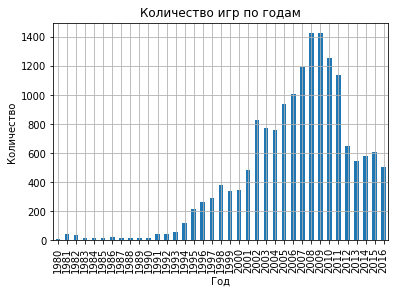

In [34]:
games_by_years.plot(kind='bar', grid=True)

plt.xlabel('Год')
plt.ylabel('Количество')
plt.title('Количество игр по годам')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

**Вывод:** до 1993 года игровая индустрия еще не была развита, ежегодно выпускалось лишь по несколько десятков игр. Массовым выпуск можно считать с 1995 года, когда ежегодный выпуск превысил 200 игр в год. Пик развития игровой индустрии пришелся на 2008-2009 гг, далее идёт откат вплоть до 50%. Такой всплеск может быть обусловлен массовой популяризацией различных платформ. Некоторые из них в последствии прекратили существование и количество игр уменьшилось. Также мог оказать влияние и мировой кризис 2008 года, который затронул многие отрасли экономики. Для дальнейшего анализа игры, выпущенные ранее 1995 года не потребуются - за прошедшие 20 лет технологии шагнули на 10 шагов вперёд. То, что было популярно в 1980 не будет актуально в 2017. Популярность на заре игровой индустрии могла быть обусловлена новизной технологии и малым выбором игр, сейчас ситуация в корне другая, выбор игр огромный, а их детализация вырасла кратно.

###  Продажи по платформам

Построим сводную таблицу с суммой продаж по каждой платформе. Посмотрим на лидеров.

In [35]:
platforms = df.pivot_table(index= 'platform',
                           values='total_sales',
                           aggfunc='sum').sort_values(by='total_sales', ascending=False)
platforms.head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


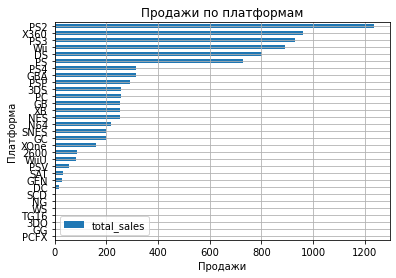

In [36]:
platforms.sort_values(by='total_sales').plot(kind='barh', grid=True)

plt.xlabel('Продажи')
plt.ylabel('Платформа')
plt.title('Продажи по платформам')
plt.show()

Безоговорочным лидером является `PS2`. Далее постепенно уменьшаясь следуют ще пять платформ: `X360, PS3, Wii, DS, PS`. А вот потом наступает существенный провал в продажах. Здесь находятся и новинки рынка, такие как `PS4, XOne`, так и платформы, которые рынок постепенно покидают, например `PSP`. Наша задача определить самые продаваемые игры, поэтому рассмотрим первые 6 платформ в разрезе по годам.

In [37]:
#выделяем названия топ-6 платформ
platforms = platforms.head(6).index
platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

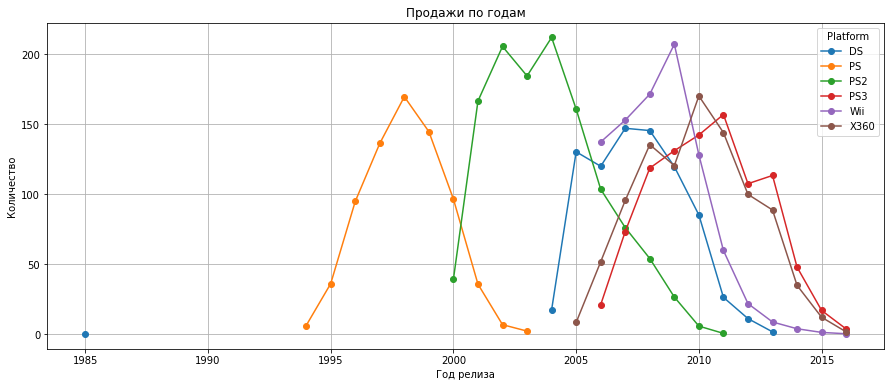

In [38]:
# Фильтруем данные по выбранным платформам
top_platforms = df[df['platform'].isin(platforms)]

# Строим распределение продаж по годам для выбранных платформ
platform_sales_by_years = top_platforms.pivot_table(index='year_of_release',
                                                   columns='platform',
                                                   values='total_sales',
                                                   aggfunc='sum')

# Строим график распределения продаж по годам для выбранных платформ
platform_sales_by_years.plot(kind='line', marker='o', figsize=(15, 6), grid=True)

plt.xlabel('Год релиза')
plt.ylabel('Количество')
plt.title('Продажи по годам')
plt.legend(title='Platform')
plt.show()

На отметке 1985 года появилась отдельностоящая точка. Стоит проверить, что это такое.

In [39]:
df.query('year_of_release == 1985 and platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Платформа Nintendo DS была выпущена в 2004 году. Данная строка является артефактом, ее необходимо удалить, чтобы получить более наглядный график.

In [40]:
#удаляем строку
df = df.drop(index=15957)

Заново фильтруем данные по той же схеме, но уже без артефактной строки.

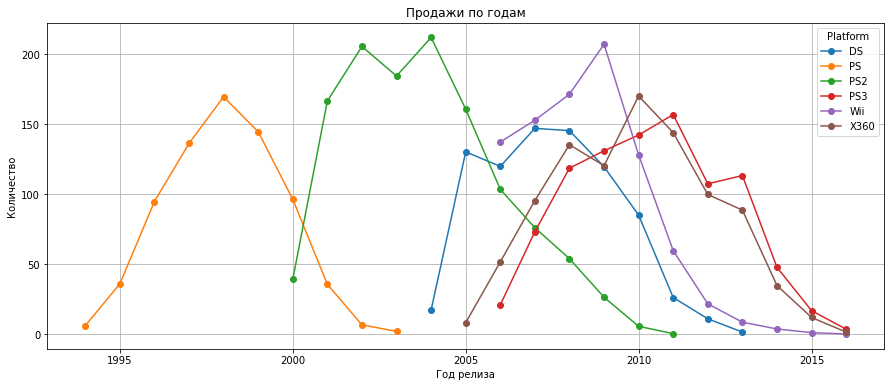

In [41]:
# Фильтруем данные по выбранным платформам
top_platforms = df[df['platform'].isin(platforms)]

# Строим распределение продаж по годам для выбранных платформ
platform_sales_by_years = top_platforms.pivot_table(index='year_of_release',
                                                   columns='platform',
                                                   values='total_sales',
                                                   aggfunc='sum')

# Строим график распределения продаж по годам для выбранных платформ
platform_sales_by_years.plot(kind='line', 
                             marker='o', 
                             figsize=(15, 6), 
                             grid=True)

plt.xlabel('Год релиза')
plt.ylabel('Количество')
plt.title('Продажи по годам')
plt.legend(title='Platform')
plt.show()

Проверим средний срок жизни платформ.

In [42]:
# смотрим средний срок жизни
temp = df.copy() 
time_life = temp.pivot_table(index='platform', 
                             values='year_of_release', 
                             aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Огласите весь список, пожалуйста!

In [43]:
time_life.sort_values(by='life')

,platform,min,max,life
,,year_of_release,year_of_release,
9,GG,1992,1992,1
14,PCFX,1996,1996,1
24,TG16,1995,1995,1
1,3DO,1994,1995,2
22,SCD,1993,1994,2
25,WS,1999,2001,3
12,NG,1993,1996,4
30,XOne,2013,2016,4
18,PS4,2013,2016,4


**Выводы:**
- Первой популярной платформой стала PlayStation компании Sony. Она появилась в 1994 году и стала стремительно набирать популярность вплоть до 1998 года, потом слудет спад и в 2003 году консоль окончательно уходит с рынка. Итого срок жизни 9 лет.
- Ей на смену в 2000 году приходит обновленная PS2 и в первый год превосходит продажи своей предшественницы. PS2 была популярна до 2004 года, далее идет спад и в 2011 году консоль также прекращает существование. Итого срок жизни 11 лет.
- В 2004 году у Sony появляется конкурент - Nintendo DS. Консоль тоже становится весьма популярной, но до пиковых продаж даже PS не дотягивает. Консоль выходит на пик популярности в первые годы и тажкже, как и предшественницы спустя 5-6 лет теряет свои позиции и к 2013 году полностью покидает рынок. Итого срок жизни 9 лет.
- В 2005 году компания Microsoft тоже решила делать приставки и выпустила свой X360. Он улучшал продажи вплоть до 2010 года, а потом продажи пошли на спад. Сейчас еще можно купить игры на X360, но популярностью он не пользуется. На рынке уже 11 лет, продолжает жить.
- В 2006 году Sony выпускает очередную новинку - PS3, ее популярность растет и снижается параллельно X360. На рынке уже 10 лет, продолжает жить.
- В том же 2006 году Ninendo выпускает революционную новинку! Это Wii, с возможностью управления жестами. Естественно, новинка моментально получает внимание геймеров со всего мира! Это же тормозит развитие продаж игр на PS3 и X360. Однако, в 2010 году Sony и Microsoft выпускают дополнения к своим приставкам - Move для PS3 и Kinect для X360, которые также позволяют играть без использования традиционных геймпадов. В этот же момент эти два гиганта забираются на вершину популярности, а Wii также стремительно ее теряет. На рынке уже 10 лет, продолжает жить.
- На пик популярности платформы обычно выходят за 2-3 года, потом столько же держатся на вершине, далее следует неминуемый спад.
- Каждая платформа в среднем существует порядка 7 лет, хотя были платформы, которые прожили всего 1-3 года, а вот PC существует уже 32 года и никуда не собирается.
- Максимальную прибыль платформа приносит со 2 по 6 год своего существования. Исключение - Wii, которые взлетели сразу на счет своей уникальности, но таже быстро упали, когда акулы рынка выпустили свои обновления.
- К 2016 году все из вышеперечисленных консолей практически исчерпали свой ресурс. Им на смену приходят новые платформы. Чтобы определить лидеров продаж на 2017 год, необходимо рассматривать другие, более новые платформы.

###  Актуальные данные

Как видно по прошой главе, лидеры прошлого уже практически покинули рынок. Для составления прогноза на 2017 год лучше использовать более актуальные данные по новым платформам. Соответственно, всё, что появилось на рынке до 2012 года нас в принципе мало интересует - эти платформы уже прошли свой пик и далее продажи будут только падать. Желательно найти те платформы, которые появились 1-2 года назад. Хорошо бы, чтобы они были "с именем", то есть продолжатели ушедшей эпохи.

In [44]:
#фильтруем данные
actual = df.query('year_of_release > 2011')

actual_by_years = actual.pivot_table(index='year_of_release', 
                                     columns='platform', 
                                     values='total_sales', 
                                     aggfunc='sum')

actual_by_years

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


По полученной таблице видно, что Nintendo DS уже покинула рынок, консоль достаточно старая, выпущена еще в 2004. Та же участь постигла и PSP, они с DS одногодки. PSP продержалась немного дольше благодаря своему портативному формату, однако с развитием рынка смартфонов такой формат игр постепенно уходит в анналы истории. Эти 2 позиции просто удаляем.

In [45]:
#удаляем неактуальные данные
actual_by_years = actual_by_years.drop(columns=['DS', 'PSP'])

In [46]:
actual_by_years

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2012,51.36,23.22,107.36,NaN,16.19,21.71,17.56,99.74,NaN
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


Также можно сделать вывод, что продажи по PS3 за посление годы упали кратно, вероятно, через несколько лет платформа окончательно покинет рынок. Это же касается и X360. Продажи по ним в 2017 году еще будут, но на большую выручку рассчитывать не стоит. Также стоит сразу удалить данные по Wii - они наверняка покинут рынок через 1-2 года.

In [47]:
#удаляем неактуальные данные
actual_by_years = actual_by_years.drop(columns=['X360', 'PS3', 'Wii'])

In [48]:
actual_by_years

platform,3DS,PC,PS4,PSV,WiiU,XOne
year_of_release,,,,,,
2012,51.36,23.22,NaN,16.19,17.56,NaN
2013,56.57,12.38,25.99,10.59,21.65,18.96
2014,43.76,13.28,100.00,11.90,22.03,54.07
2015,27.78,8.52,118.90,6.25,16.35,60.14
2016,15.14,5.25,69.25,4.25,4.60,26.15


Вот теперь имеем максимально актуальные данные по продажам за 5 лет. Построим график.

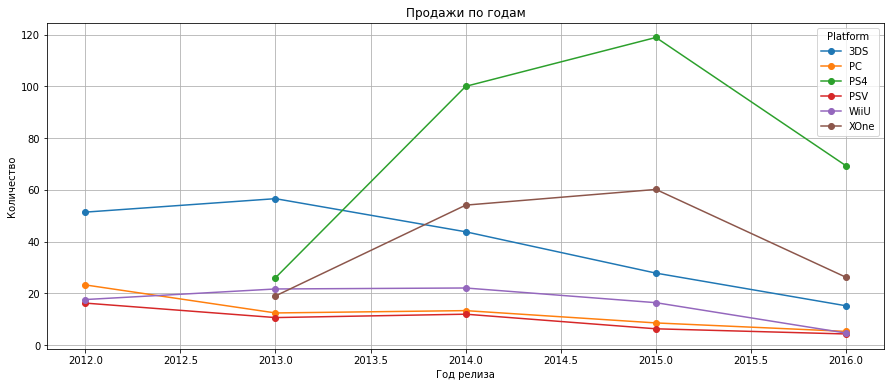

In [49]:
actual_by_years.plot(kind='line', marker='o', figsize=(15, 6), grid=True)

plt.xlabel('Год релиза')
plt.ylabel('Количество')
plt.title('Продажи по годам')
plt.legend(title='Platform')
plt.show()

**Выводы:**
- Nintendo 3DS уже прошла свой пик. Компания в фирменном стиле выпустила новинку с революционным геймплеем и сразу привлекла внимание геймеров со всего мира. Тем не менее, как уже было сказано раньше, с развитием рынка смартфонов портативные приставки постепенно исчезнут из оборота. Но ближайшие несколько лет на 3DS вполне можно заработать.
- Стационарная приставка от Nintendo WiiU вышла на рынок в 2012 году и стала набирать популярность. Однако, год спустя свои новинки выкатили Sony и Microsoft, и начала повторяться ситуация с Wii. Вероятно, продажи будут только падать. Приставка уходит, так и не достигнув высот.
- PSV пока еще имеет своих поклонников. Часть из них пришли, поменяв свою старую PSP на новый девайс, часть начинала свой геймерский пусть сразу с PSV. Здесь ситуация примерно. как и с 3DS, только хуже - здесь мы прибыли не получим.
- В лидерах однозначно PS4 и XOne. Обе консоли вышли в 2013 году и как раз сейчас находятся на пике популярности. Ближайшие годы именно от них стоит ждать максимальные прибыли.
- Не стоит сбрасывать со счетов владельцев PC. Пусть они и не приносят сверхприбылей, но это достаточно стабильный рынок со своими ценителями, которые никуда не денутся. В отличае от консолей, PC постоянно модернизируются, то есть остаются в одной платформе, а не создают революционно новые девайсы каждые 10 лет.

Построим диаграмму размаха, чтобы оченить эффективность продаж по каждой игре по каждой платформе. Данные возьмём актуальные.

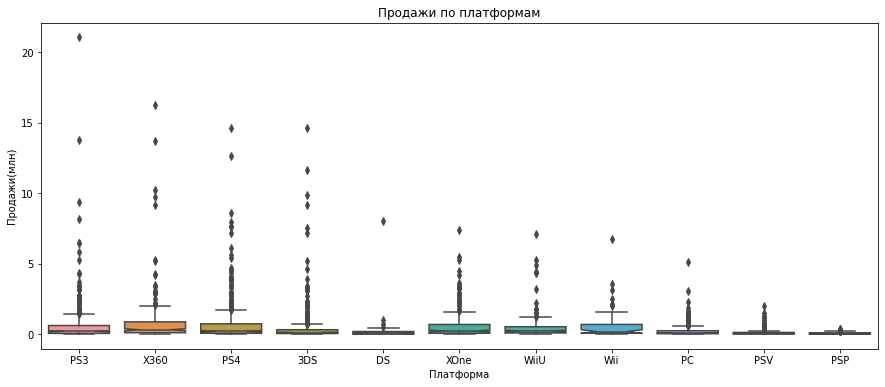

In [50]:
#диаграмма размаха
plt.subplots(figsize=(15, 6))
sns.boxplot(data= actual, x='platform', y = 'total_sales', notch=True)

plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи(млн)')
plt.show()

Видно, что получилось большое количество выбросов, выходящих далеко за пределы межквартильного размаха. Это говорит о том, что иногда на рынок выходят настоящие бестселлеры, которые пользуются огромной популярностью игроков и их продажи кратно превышают медианное значение. Построим еще одну диаграмму размаха, но с ограничением не больше 2 млн.копий, чтобы лучше рассмотреть боксплоты и все интересующие данные.

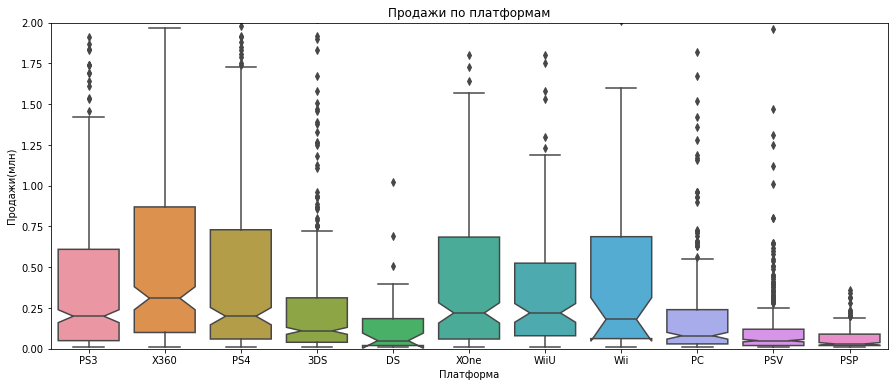

In [51]:
#диаграмма размаха
plt.subplots(figsize=(15, 6))
sns.boxplot(data= actual, x='platform', y = 'total_sales', notch=True)

plt.ylim(0, 2)
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи(млн)')
plt.show()

In [52]:
actual.groupby('platform')['total_sales'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.49,1.39,0.01,0.04,0.11,0.31,14.60
DS,31.0,0.40,1.44,0.01,0.02,0.05,0.18,8.06
PC,250.0,0.25,0.49,0.01,0.03,0.08,0.24,5.14
PS3,492.0,0.59,1.46,0.01,0.05,0.20,0.61,21.05
PS4,392.0,0.80,1.61,0.01,0.06,0.20,0.73,14.63
PSP,173.0,0.06,0.07,0.01,0.02,0.03,0.09,0.36
PSV,411.0,0.12,0.20,0.01,0.02,0.05,0.12,1.96
Wii,54.0,0.65,1.17,0.01,0.06,0.18,0.69,6.76
WiiU,147.0,0.56,1.06,0.01,0.08,0.22,0.52,7.09


In [53]:
#смотрип топ игр по продажам
actual.query('total_sales > 14')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60


**Вывод:** По двум графикам выше можно увидеть, что медианные значения продаж не так высоки. Если взять только актуальные платформы, то у PS4 медиана продаж составляет 0.20 млн., а межквартильный размах от 0.06 до 0.73 млн. На платформе 3DS медиана составляет 0.11, а половина продаж не выходит за границы от 0.04 до 0.31. XOne выдает медиану чуть выше - 0.22, а межквартильный размах от 0.06 до 0.68. При этом на каждой платформе присутствуют игры, проданные тиражом всего 0.01 млн., т.е. полностью провалившиеся в продажах. Но, вместе с тем, попадаются игры, пробивающие потолок в десяток раз. Например, новинка на PS4 `Call of Duty: Black Ops 3` продалась 14.63 млн. раз, примерно столько же у `Pokemon X/Pokemon Y` на 3DS. В недавнем прошлом тоже были такие всплески продаж- GTA V на PS3 и X360 в сумме продалась в количестве 37.32 млн. копий. За счет таких больших выбросов средние значения продаж в несколько раз превышают медианные.

In [54]:
#выводим топ-5 игр для PC в 2012 году.
df.query('platform == "PC" and year_of_release == 2012').sort_values(by='total_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,Diablo III,PC,2012,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
688,Guild Wars 2,PC,2012,Action,0.96,1.07,0.0,0.27,90.0,7.9,T,2.30
959,World of Warcraft: Mists of Pandaria,PC,2012,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82
1227,Call of Duty: Black Ops II,PC,2012,Shooter,0.64,0.69,0.0,0.19,74.0,4.2,M,1.52
1763,Football Manager 2013,PC,2012,Sports,0.00,0.95,0.0,0.21,86.0,6.7,unknown,1.16


Вот и основная причина. Одна только Diablo III была продана тиражом более 5 миллионов копий. Эта игра была обречена на успех, так как являлась продолжителем Diablo II, которая также была культовой ранее.

###  Влияние отзывов на продажи

Возьмём для примера самую популярную на текущий момент PS4. Выделим строки только с этой платформой.

In [55]:
#данные по PS4
df_ps4 = actual[actual['platform'] == 'PS4']

In [56]:
#проверка на пропуски после разделения
df_ps4.isna().mean().round(2)

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.36
user_score         0.34
rating             0.00
total_sales        0.00
dtype: float64

Новых пропусков после разделения не образовалось. Только уже известные ранее оценки пользователей и критиков. Можно построить диаграммы рассеяния для выявления корреляции между оценками и объемом продаж. А также проверим коэффициенты корреляции. Для удобства создадим функцию, которы сразу будет строить 2 графика и считать корреляцию для каждого из них. Так будет удобней в дальнейшем.

In [57]:
def plot_constr(dataset):
    
    '''
   Строит графики рассеивания по двум критериям и считает корреляцию
   '''
    #задаем параметры
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Первый график: зависимость от оценки критиков
    dataset.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, ax=axs[0])
    axs[0].grid(True)
    axs[0].set_xlabel('Оценка критиков')
    axs[0].set_ylabel('Продажи (млн)')
    axs[0].set_title(f'Зависимость от оценки критиков {dataset["platform"].unique()[0]}')

    # Второй график: зависимость от оценки пользователей
    dataset.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, ax=axs[1])
    axs[1].grid(True)
    axs[1].set_xlabel('Оценка пользователей')
    axs[1].set_ylabel('Продажи (млн)')
    axs[1].set_title(f'Зависимость от оценки пользователей {dataset["platform"].unique()[0]}')


    # Вывод графиков
    plt.tight_layout()
    plt.show()

    #смотрим корреляцию
    display(f'Корреляция оценок критиков и продаж: {dataset["critic_score"].corr(dataset["total_sales"])}')
    display(f'Корреляция оценок игроков и продаж: {dataset["user_score"].corr(dataset["total_sales"])}')

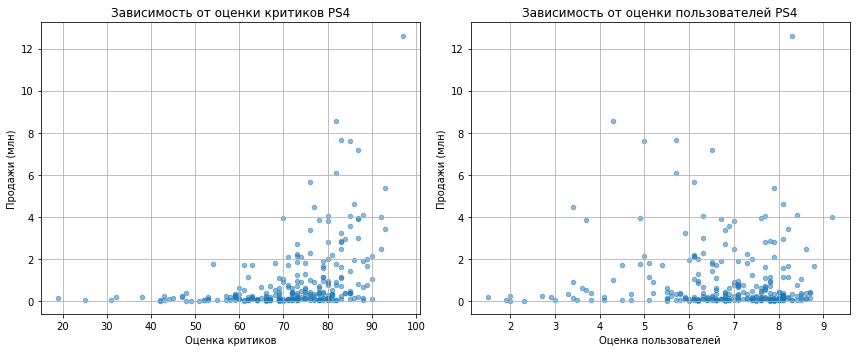

'Корреляция оценок критиков и продаж: 0.40656790206178095'

'Корреляция оценок игроков и продаж: -0.031957110204556376'

In [58]:
plot_constr(df_ps4)

**Вывод:** оценка критиков имеет слабую положительную корреляцию с объемом продаж. И действительно, самая высокооцененная игра была продана самым большим тиражом, это видно на графике. Но в целом, корреляцию в 0,40 можно описать как слабую. Пользователи покупают игры больше опираясь но собственные предпочтения или ощущения, мнения экспертов их мало интересуют. Это же подтверждает зависимость продаж от отзывов игроков - этой зависимости просто нет. Не важно, насколько игра хорошая или плохая по мнению других игроков, на объемы продаж это не влияет.

Кстати, что же это за игра, ушедшая тиражом более 12 млн.?

In [59]:
df_ps4.query('total_sales > 12')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Таких игр оказалось даже 2, просто Call of Duty: Black Ops 3 вышла совсем недавно и критики с игроками еще не успели оценить ее, а продажи у нее даже выше, чем у GTA V.

Для чистоты эксперимента построим такие же графики для других платформ. Пусть это будут X360, как популярная в прошлом платформа, и PC, как вечная классика. Также возьмём портативные 3DS и PSV.

In [60]:
#данные по X360
df_x360 = actual[actual['platform'] == 'X360']
df_pc = actual[actual['platform'] == 'PC']
df_3ds = actual[actual['platform'] == '3DS']
df_psv = actual[actual['platform'] == 'PSV']
df_wii = actual[actual['platform'] == 'Wii']

In [61]:
#обязательная проверка на пропуски
display(df_x360.isna().mean().round(2))
display('')
display(df_pc.isna().mean().round(2))
display('')
display(df_3ds.isna().mean().round(2))
display('')
display(df_psv.isna().mean().round(2))
display('')
df_wii.isna().mean().round(2)

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.41
user_score         0.20
rating             0.00
total_sales        0.00
dtype: float64

''

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.21
user_score         0.18
rating             0.00
total_sales        0.00
dtype: float64

''

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.74
user_score         0.71
rating             0.00
total_sales        0.00
dtype: float64

''

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.74
user_score         0.68
rating             0.00
total_sales        0.00
dtype: float64

''

name               0.00
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.91
user_score         0.69
rating             0.00
total_sales        0.00
dtype: float64

**Данные по Х360**

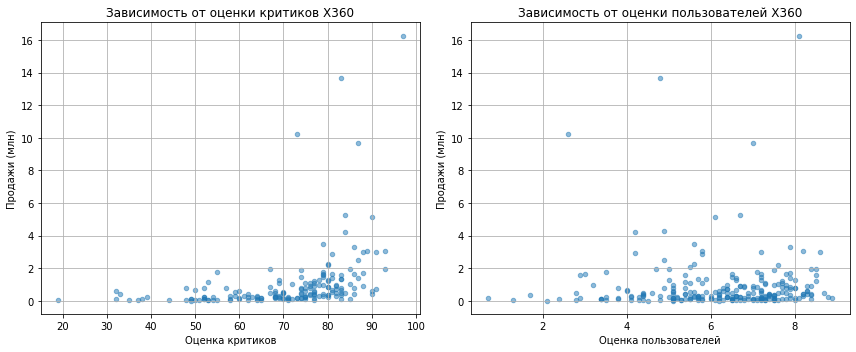

'Корреляция оценок критиков и продаж: 0.3605734888507336'

'Корреляция оценок игроков и продаж: 0.006163978646213326'

In [62]:
#X360
plot_constr(df_x360)

**Вывод:** корреляция с оценками критиков слабоположительная 0.36. Корреляции с оценками пользователей нет.

**Данные по PC**

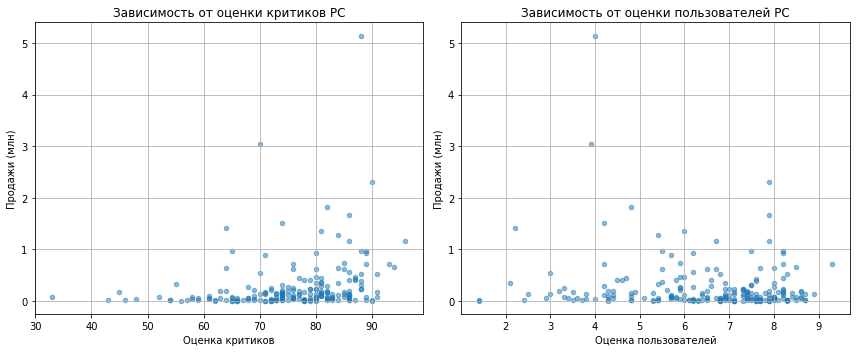

'Корреляция оценок критиков и продаж: 0.23724324311567915'

'Корреляция оценок игроков и продаж: -0.12186747630735577'

In [63]:
#PC
plot_constr(df_pc)

**Вывод:** корреляция с оценками критиков слабоположительная  0.23. Корреляция с оценками пользователей очень слабоотрицательная -0.12, это равносильно отсутствию корреляции.

**Данные по 3DS**

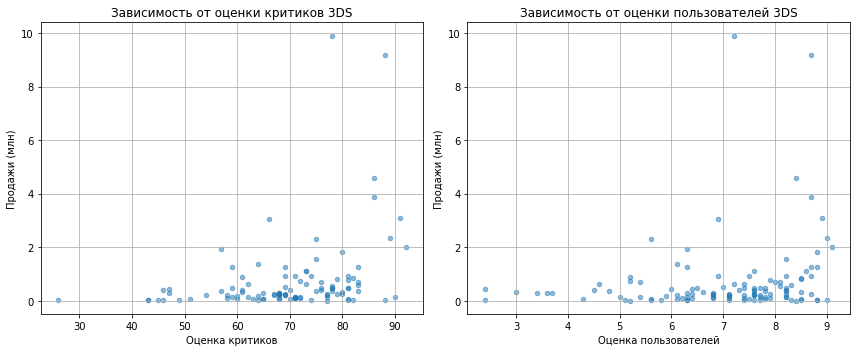

'Корреляция оценок критиков и продаж: 0.3208028695360785'

'Корреляция оценок игроков и продаж: 0.19758263411038599'

In [64]:
#3DS
plot_constr(df_3ds)

**Вывод:** корреляция с оценками критиков слабоположительная  0.32. Корреляция с оценками пользователей также слабоположительная, но еще меньше, лишь 0.2

**Данные по PSV**

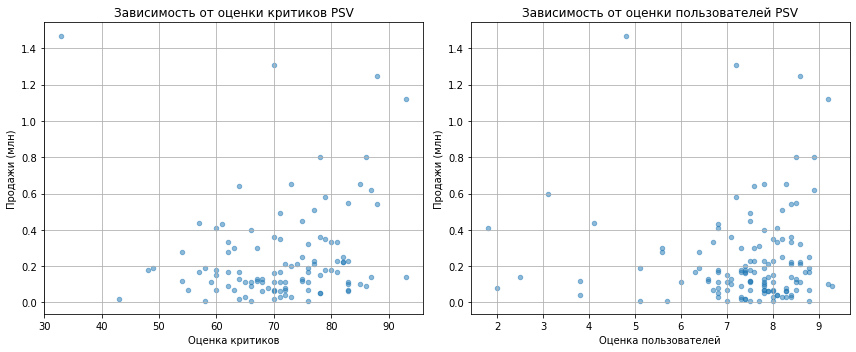

'Корреляция оценок критиков и продаж: 0.0944878992931617'

'Корреляция оценок игроков и продаж: -0.004339437514314869'

In [65]:
#PSV
plot_constr(df_psv)

**Вывод:** В данном случае корреляция и вовсе отсутствует для обоих параметров.

**Общий вывод:** как видно, в большинстве в случаев оценка критиков имеет прямую корреляцию с объёмом продаж, хоть и слабую. А вот в отношении оценки зрителей, корреляция стремится к 0, то есть взаимосвязи нет. Исключение - Nintendo 3DS, нои там корреляция достаточно слабая.

###  Распределение игр по жанрам

Создадим сводную таблицу по жанрам. Оценим количество игр, количество проданных копий, среднее и медианное значение проданных копий. Данные возьмём таже за последние 5 лет.

In [66]:
df_genres = actual.pivot_table(index='genre',
                           values='total_sales',
                           aggfunc=['count','sum']).round(2)
df_genres.columns = ['count', 'sum']

**1. Самые популярные и продаваемые игры.**

In [67]:
#сортировка по уникальности игр топ-5
df_genres.sort_values(by='count', ascending=False).head()

,count,sum
genre,,
Action,1031,441.12
Role-Playing,370,192.80
Adventure,302,29.43
Sports,267,181.07
Shooter,235,304.73


In [68]:
#сортировка по популярности игр топ-5
df_genres.sort_values(by='sum', ascending=False).head()

,count,sum
genre,,
Action,1031,441.12
Shooter,235,304.73
Role-Playing,370,192.80
Sports,267,181.07
Misc,192,85.04


**2. Самые непопулярные малопродаваемые игры.**

In [69]:
#сортировка по уникальности игр антитоп-5
df_genres.sort_values(by='count',).head()

,count,sum
genre,,
Puzzle,28,4.89
Strategy,71,13.34
Simulation,80,35.12
Platform,85,61.00
Fighting,109,44.49


In [70]:
#сортировка по популярности игр антитоп-5
df_genres.sort_values(by='sum').head()

,count,sum
genre,,
Puzzle,28,4.89
Strategy,71,13.34
Adventure,302,29.43
Simulation,80,35.12
Fighting,109,44.49


А теперь то же самое на графике.

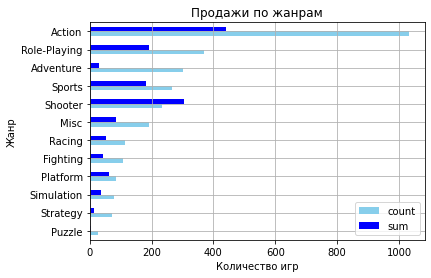

In [71]:
#строим график
df_genres.sort_values(by='count').plot(kind='barh',color=['skyblue', 'blue'])

plt.grid(True)
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.title('Продажи по жанрам')
plt.show()

Посмотрим также разбивку продаж по годам.

In [72]:
actual_genres = actual.pivot_table(index='year_of_release', 
                                     columns='genre', 
                                     values='total_sales', 
                                     aggfunc='sum')

In [73]:
actual_genres

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,119.25,5.79,9.18,22.22,18.37,1.72,13.61,46.91,71.75,13.36,30.42,3.26
2013,122.51,6.09,7.09,25.27,24.54,0.96,12.37,44.45,62.04,8.63,41.17,6.12
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


Также построим диаграмму размаха по жанрам

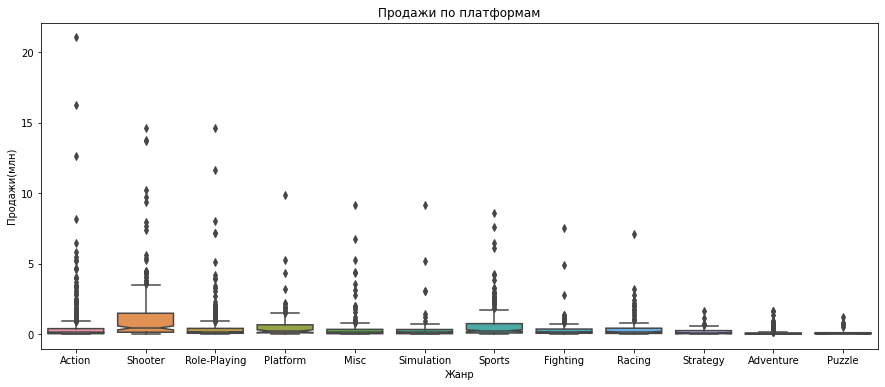

In [74]:
#диаграмма размаха
plt.subplots(figsize=(15, 6))
sns.boxplot(data= actual, x='genre', y = 'total_sales', notch=True)


plt.title('Продажи по платформам')
plt.xlabel('Жанр')
plt.ylabel('Продажи(млн)')
plt.show()

Опять из-за большого количества выбросов сложно оценить медианы. Ограничим верхнюю границу.

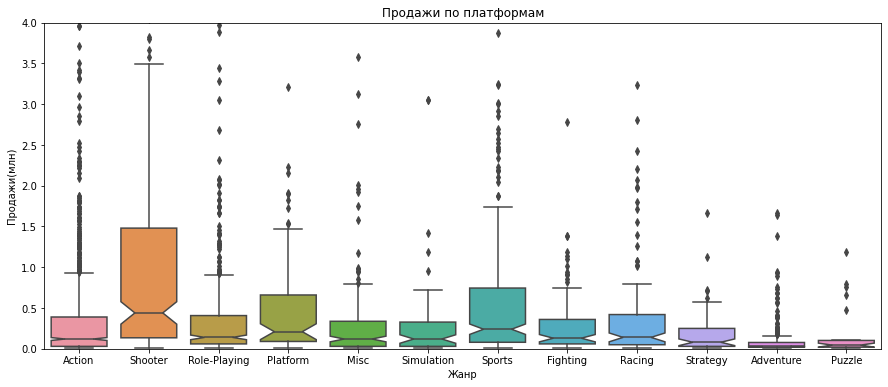

In [75]:
#диаграмма размаха
plt.subplots(figsize=(15, 6))
sns.boxplot(data= actual, x='genre', y = 'total_sales', notch=True)

plt.ylim(0, 4)
plt.title('Продажи по платформам')
plt.xlabel('Жанр')
plt.ylabel('Продажи(млн)')
plt.show()


In [76]:
actual.groupby('genre')['total_sales'].describe().round(2).sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,235.0,1.30,2.25,0.01,0.14,0.44,1.48,14.63
Sports,267.0,0.68,1.14,0.01,0.08,0.24,0.74,8.58
Platform,85.0,0.72,1.36,0.01,0.09,0.21,0.66,9.90
Racing,115.0,0.47,0.89,0.01,0.05,0.14,0.42,7.09
Role-Playing,370.0,0.52,1.32,0.01,0.06,0.14,0.41,14.60
Fighting,109.0,0.41,0.91,0.01,0.06,0.13,0.36,7.55
Action,1031.0,0.43,1.17,0.01,0.03,0.12,0.39,21.05
Misc,192.0,0.44,1.08,0.01,0.03,0.12,0.34,9.18
Simulation,80.0,0.44,1.24,0.01,0.03,0.12,0.33,9.17


**Выводы:**
- Первое место и по частоте выпуска и по по объёму продаж с отрывом занимет `Action`. Всего выпущено 1031 игр, проданных общим тиражом 441.12 млн.шт. На втором месте расположился `Role-Playing` c 370 играми, а общий тираж уже занимет третью строчку и составаляет о 192.80 млн.шт. На третьей строчке по разнообразию оказался `Adventure`, но очень большой популярности у игроков не сыскал и не попал даже в топ-5. Также в пятерку самых разнообразных и самых популярных попали игры жанра `Shooter` и `Sports`.
- Реже всего покупают `Pazzle`, `Strategy` и `Adventure` . Самые редкие игры -` Pazzle`, `Strategy`, `Simulation`
- По диаграмме размаха видно, что по всем жанрам присутствуют значительные выбросы, за счет которых в соновном и формируется общая выручка, а также сильно завышается среднее значение по продажам. В случае продаж игр стоит ориентироваться не на сумарные продажи по жанру, а на стабильность продаж по жанру. Да, некоторые игры "выстреливают" и приносят значительную прибыль, но в основной массе игры жанра могут иметь значения по продажам сильно меньше.
- Самые стабильные по продажам:  `Shooter`, `Sports` и `Platform` . Шутеры особенно выделяются из этой тройки: здесь и большой выбор игр (235 шт), и медианные продажи составляют 0.44 млн., межквартильный размах от 0.14 до 1.48 млн., шанс получить большие продажи тоже присутствует - максимальное значение продаж составляет 14.63 млн.!
- В категории `Sports` также присутствует достаточный ассортимент игр (267 шт). Средние продажи здесь составляют 0.24 млн, половина продаж приходится на диапазон от 0.08 до 0.74 млн. Самая популярная игра продана в количестве 8.58 млн. копий.
- В жанре `Platform` ассортимент игра значительно скромнее (85 шт), но средние продажи по ним не отстают от 2 места: медиана 0.21 млн., межквартильный размах 0.09 - 0.66 млн.
- А вот касательно жанра `Action` всё весьма неоднозначно. Несмотря на самый большой ассортимент игр, самые большие итоговые продажи и принадлежность самой продаваемой игры именно этому жанру, медианное значение составляет лишь 0.12 млн и это только 7 место рейтинга. При ставке на этот жанр стоит учитывать, что далеко не все игры будут продаваться хорошо, наоборот львиная доля провалится. Следует более внимательно выбирать игры для продажи(продолжения культовых серий, ожидаемые новинки)
- Лидерами антирейтинга становятся игры жанра `Adventure`. Несмотря на большой выбор (302 шт), средние продажи составляют только 0.03 млн., а самая популярная игра продалась 1.66 млн раз.

##  Портрет типичного пользователя каждого региона

###  Самые популярные платформы

In [77]:
#Северная Америка
platform_na = actual.pivot_table(index='platform', 
                               values='na_sales',
                               aggfunc='sum').sort_values(by='na_sales', ascending=False)
platform_na.columns = ['sales']

platform_na

,sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


Оставим топ-5, а остальные собрем в группу "Другие". Упакуем в функцию для дальнейшего использования.

In [79]:
def sales_top(dataset):
    '''
    Оставляет топ-5 значений, остальные суммирует в "Другие"
    '''
    
    # Выбираем первые 5 значений
    top_genres = dataset.index[:5]

    # Суммируем продажи для остальных значений
    other_sales = dataset.loc[~dataset.index.isin(top_genres)].sum()

    # Создаем итоговый датафрейм
    genres_top = dataset.loc[top_genres]
    genres_top.loc['Другие'] = other_sales

    return genres_top

In [80]:
platform_na = sales_top(platform_na)
platform_na

,sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
Другие,90.37


In [81]:
#Европа
platform_eu = actual.pivot_table(index='platform', 
                               values='eu_sales',
                               aggfunc='sum').sort_values(by='eu_sales', ascending=False)
platform_eu.columns = ['sales']

platform_eu

,sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


Объединяем по той же схеме

In [82]:
platform_eu = sales_top(platform_eu)
platform_eu

,sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64
Другие,90.12


In [83]:
#Япония
platform_jp = actual.pivot_table(index='platform', 
                               values='jp_sales',
                               aggfunc='sum').sort_values(by='jp_sales', ascending=False)
platform_jp.columns = ['sales']

platform_jp

,sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


И то же самое для Японии

In [84]:
platform_jp = sales_top(platform_jp)
platform_jp

,sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
Другие,19.49


Построим три графика рядом для наглядности

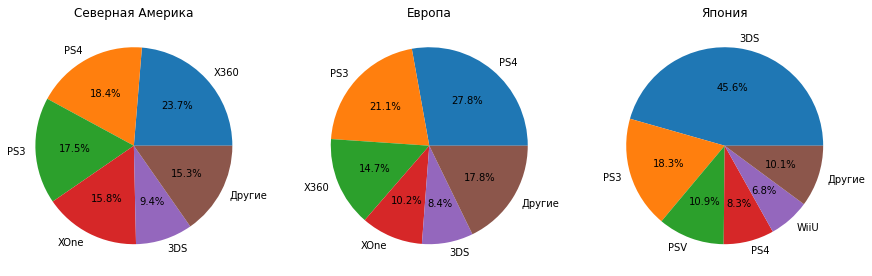

In [85]:
# Создаем отдельные графики для каждой круговой диаграммы
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Северная Америка
platform_na['sales'].plot(kind='pie', autopct='%0.1f%%', ax=axs[0])
axs[0].set_ylabel('')
axs[0].set_title('Северная Америка')

# Европа
platform_eu['sales'].plot(kind='pie', autopct='%0.1f%%', ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_title('Европа')

# Япония
platform_jp['sales'].plot(kind='pie', autopct='%0.1f%%', ax=axs[2])
axs[2].set_ylabel('')
axs[2].set_title('Япония')

plt.show()

**Выводы:**
- В Северной Америке самой популярной платформой является Х360 прошлого поколения, ее предпочитают 23,7% игроков. Далее примерно одинаковую долю занимают PS3, PS4. Немного реже используется XOne - 15,8%. Замыкает пятерку портативная 3DS, но ее доля заметно меньше 9,4%
- В Европе напротив игроки предпочитают новые платформы. Так лидирующую строчку занимает PS4 с долей 27,8% , далее следует PS3(21,1%) и Х360 предыдущего поколения(14,7%). А вот новинка от Microsost - XOne пока не сыскала такой же попуярности(10,2%), ее доля вдвое меньше и сравнима с портативной 3DS(8,4%).
- В Японии общая продажа игр вдвое меньше, а самые популярные полатформы как раз портативные - лидер 3DS - поти половина рынка(45,6%), а 3 строчку рейтинга держит за собой PSV(10,9%). Из стационарных приставок стоит отметить PS3 и ее второе место рейтинга(18,3%). Замыкают пятерку PS4 и WiiU.

###   Самые популярные жанры

In [86]:
#Северная Америка
genres_na = actual.pivot_table(index='genre', 
                               values='na_sales',
                               aggfunc='sum').sort_values(by='na_sales', ascending=False)
genres_na.columns = ['sales']
genres_na

,sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


Объединяем по знакомой схеме.

In [88]:
genres_na = sales_top(genres_na)
genres_na

,sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Другие,84.64


In [89]:
#Европа
genres_eu = actual.pivot_table(index='genre', 
                               values='eu_sales',
                               aggfunc='sum').sort_values(by='eu_sales', ascending=False)
genres_eu.columns = ['sales']

genres_eu

,sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


Повторяем операцию для Европы

In [90]:
genres_eu = sales_top(genres_eu)
genres_eu

,sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29
Другие,89.10


In [91]:
#Япония
genres_jp = actual.pivot_table(index='genre', 
                               values='jp_sales',
                               aggfunc='sum').sort_values(by='jp_sales', ascending=False)
genres_jp.columns = ['sales']

genres_jp

,sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


И то же самое объединение для Японии

In [92]:
genres_jp = sales_top(genres_jp)
genres_jp

,sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Другие,41.63


Построим также 3 графика рядом для удобства.

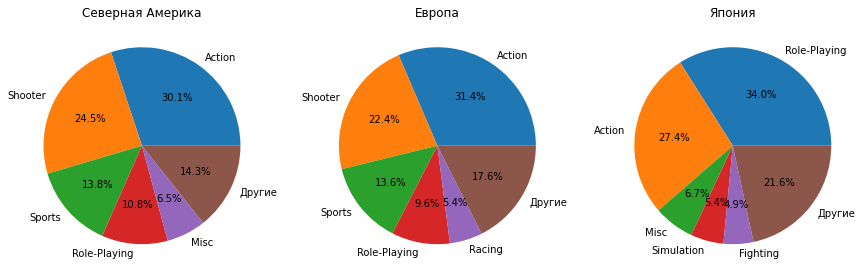

In [93]:
# Создаем отдельные графики для каждой круговой диаграммы
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Северная Америка
genres_na['sales'].plot(kind='pie', autopct='%0.1f%%', ax=axs[0])
axs[0].set_ylabel('')
axs[0].set_title('Северная Америка')

# Европа
genres_eu['sales'].plot(kind='pie', autopct='%0.1f%%', ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_title('Европа')

# Япония
genres_jp['sales'].plot(kind='pie', autopct='%0.1f%%', ax=axs[2])
axs[2].set_ylabel('')
axs[2].set_title('Япония')

plt.show()

**Выводы:**
- В Северной Америке и Европе предпочтения игроков почти одинаковые. Тройка лидеров: Action(30 - 31.5%), Shooter(22.4 - 24.5%), Sports(13.6 13.8%). На 4 месте Role-Playing(9.6 - 10.8%). А вот на 5 позиции в регионе NA находится Misc(6.5%), а вот в EU это Racing(5.4%).
- В Японии Action тоже весьма популярен(27.4%), но находится только на втором месте. Лидерами же являются игры жанра Role-Playing(34%). С большим отставанием далее идут Misc(6.7%), Simulation(5.4%), Fighting(4.9%).
- Лидером продаж является Северная Америка, немного меньше играют в Европе, а вот в Японии играют примерно в 3 раза меньше. Скорее всего такая особенность менталитета, японцы больше озабочены карьерой, чем развлечениями

###   Влияние рейтинга ESRB на продажи в регионах

In [94]:
#Северная Америка
rating_na = actual.pivot_table(index='rating', 
                               values='na_sales',
                               aggfunc='sum').sort_values(by='na_sales', ascending=False).head()
rating_na

,na_sales
rating,
M,231.57
E,114.37
unknown,103.31
E10+,75.70
T,66.02


In [96]:
#Европа
rating_eu = actual.pivot_table(index='rating', 
                               values='eu_sales',
                               aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()
rating_eu

,eu_sales
rating,
M,193.96
E,113.03
unknown,91.50
E10+,55.37
T,52.96


In [97]:
#Япония
rating_jp = actual.pivot_table(index='rating', 
                               values='jp_sales',
                               aggfunc='sum').sort_values(by='jp_sales', ascending=False)
rating_jp

,jp_sales
rating,
unknown,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


Построим также 3 графика рядом

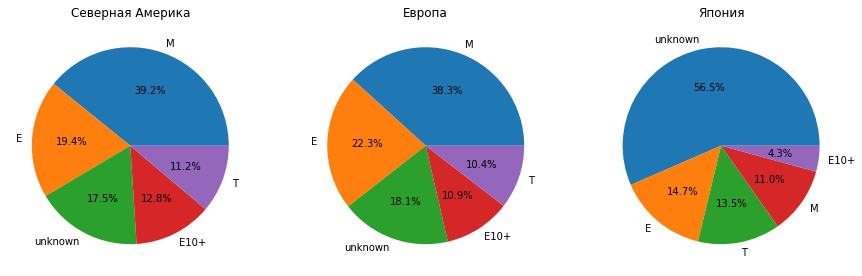

In [98]:
# Создаем отдельные графики для каждой круговой диаграммы
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Северная Америка
rating_na['na_sales'].plot(kind='pie', autopct='%0.1f%%', ax=axs[0])
axs[0].set_ylabel('')
axs[0].set_title('Северная Америка')

# Европа
rating_eu['eu_sales'].plot(kind='pie', autopct='%0.1f%%', ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_title('Европа')

# Япония
rating_jp['jp_sales'].plot(kind='pie', autopct='%0.1f%%', ax=axs[2])
axs[2].set_ylabel('')
axs[2].set_title('Япония')

plt.show()

**Выводы:**
- В Америке и Европе предпочтения игроков исходя изи рейтинга совпали на 100%. С большим отрывом лидируют игры только для взрослых (17+) - их доля почти 40%, в половину меньше продаются игры для всех возрастов (0+) - примерно 20%, по 10-12% занимают игры для подростков(10+ и 13+), в 18% случаев рейтинг еще не установлен или его просто нет.
- В Японии же 56,5% рынка занимают игры без рейтинга. Вспоминая, что самые популярные платформы - портативные, можно предположить, что именно они зачастую не имеют рейтинга. Доля игр только для взрослых всего 11%, хотя доли игр для всех и для подростков занимают немногим большую часть

##  Проверка гипотез

###  Средние пользовательские рейтинги платформ ХOne и PC равны

- Нулевая гипотеза: средний рейтинг платформы XOne равен среднему рейтингу платформы PC.
- Альтернативная гипотеза: средний рейтинг платформы XOne не равен среднему рейтингу платформы PC.

В данном случае предстоит проверить гипотезу о равенстве средних двух генеральных совокупностей. Уровень статистической значимости установим на общепринятом уровне 5%. Поскольку имеется большое количество пропусков значений, удалим эти строки. Для проверки гипотезы они не нужны.

In [100]:
actual = actual.dropna(subset=['user_score'])

In [101]:
#проверка на пропуски
actual.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       234
user_score           0
rating               0
total_sales          0
dtype: int64

In [102]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(actual.query('platform == "XOne"')['user_score'], actual.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Заодно посмотрим на средние значения рейтингов.

In [103]:
display(actual.query('platform == "XOne"')['user_score'].mean())
actual.query('platform == "PC"')['user_score'].mean()

6.521428571428572

6.4286407766990274

**Вывод:** Не получилось отвергнуть нулевую гипотезу. Верояность случайно получить в выборке разные средние значения составляет более 55%, то есть в случае отличия средних величин это будет обусловлено ошибкой выборки. В случае установки alpha = 0,01 результат проверки бы не изменился. Фактические медианные значения лишний раз подтверждают результаты проверки.

###  Средние пользовательские рейтинги жанров Action и Sports разные.

В качестве нулевой гипотезы возмём утверждение, что рейтинги равны.

- Нулевая гипотеза: средний рейтинг жанра Action равен среднему рейтингу жанра Sports.
- Альтернативная гипотеза: средний рейтинг жанра Action не равен среднему рейтингу жанра Sports.

In [104]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(actual.query('genre == "Action"')['user_score'], actual.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Также сразу посмотрим на фактические средние значения.

In [105]:
display(actual.query('genre == "Action"')['user_score'].mean())
actual.query('genre == "Sports"')['user_score'].mean()

6.825047801147227

5.455670103092784

**Вывод:** отвергаем нулевую гипотезу. Значение p-value близко к 0, это означает, что случайно получить результат, где средние рейтинги двух жанров будут равны практически невозможна, склоняемся к гипотезе, что рейтинги не равны. Таким образом, не можем отвергнуть первоначальное предположение, что средние рейтинги Action и Sports разные. В случае установки alpha = 0,01 результат проверки бы не изменился. Фактически медианные значения также отличаются, что не противоречит исследованию.

**Общий вывод к главе 5:** При формулировани гипотез был применен метод проверки равества средних двух генеральных совокупностей. В качестве нулевых были выдвинуты гипотезы о равенстве средних двух генеральных совокупностей.В качестве альтернативных - противоположно заявление: средние двух генеральных совокупностей не равны. Для тестирования данных гипотез подходит метод двустороннего t-test. В качестве критериев для проврки были выбраны игры, рейтинг на которые установлен, а точнее непосредственно сами рейтинги. Игры без рейтинга при проверке гипотез не учитывались. 

##  6. Общий вывод

Проведена предварительная обработка данных:
- исправлены названия столбцов,
- удалены дубликаты,
- заполнены пропуски, где это возможно,
- удалены неинформативные строки и артефакты,
- преобразованы типы данных.
- посдсчитаны суммарные продажи.

Проведен исследовательский анализ данных:
- пик продаж приходился на  период 2008-2009 гг. и достигал отметок в 1,4 милларда копий,
- с 2011 года фактичесикий уровень продаж находится около отметки 600 млн. копий в год,
- исторически самыми популярными платформами были Sony PlayStation первых трех поколений, первый XBox и Nintendo со своими DS и революционной Wii,
- на текущий момент основную популяность получают новинки: PS4 и XOne. С некоторым отставанием идет WiiU и портативка 3DS,
- игры на PC стабильно держат свою долю рынка на протежении многих лет, не стоит сбрасывать со счетов,
- оценки экспертов хоть и слабо, но влияют на итоговые продажи: чем выше оценка, тем выше продажи,
- оценки пользователей на итоговые продажи влияния не оказывают,
- больше всех по общему объему продаются игры жанра Action, но это проискодит в основном за счет редких удачных релизов. Средние значения продаж достаточно скромные,
- самые стабильные игры жанра Shooter, их средние продажи имеют самый высокий уровень.

Составлен портрет типичного пользователя по регионам:
- в Северной Америке игроки в основном предпочитают стационарные консоли. Немного опережает всех X360, с небольшим отставанием идут PS3, PS4 и XOne. Реже играют в портивную консоль 3DS, но всё равно относительно часто. Из жанров предпочитают Action, Shooter, Sports. Порядка 40% игроков выбирают игры только для взрослых(17+), еще около 20% выбирают игры для всех(0+),
- в Европе предпочтение достается новинке рынка - PS4. Также достаточно популярны те же PS3, X360 и XOne. С портативной 3DS такая же ситуация, как и в Америке. В жанрах европейцы солидарны с американцами и выбирают те же Action, Shooter, Sports. По рейтингу ESRB ситуация также схожа с Америкой - значения очень близкие,
- в Японии предпочтение отдается портативным приставкам. Основная масса выбирает 3DS, немного меньше играют в PSV. Из стационарных приставок выделяется только PS3. Самые популярные жанры: ролевые игры и экшен. Большинство игр в этом регионе не имеют рейтинга.

Проверены гипотезы:
- Средние пользовательские рейтинги платформ ХOne и PC равны - не получилось отвергнуть гипотезу,
- Средние пользовательские рейтинги жанров Action и Sports разные - не получилось отвергнуть гипотезу.

**Рекомендации** 

При составлении плана продаж на 2017 год следует учитывать следующие рекомендации:
- основная доля продаж прогнозируется на платформах PS4 и XOne.
- В Америке и Европе стоит сделать упор на "стрелялки" и спортивные игры на стационарные консоли(PS4, PS3, XOne, X360), с осторожностью вибирать игры Adveture, за редким исключением они не показывают больших продаж, однако за счет ожидаемых новинок можно сделать хорошую кассу.
- В Америке еще в ходу устаревший X360, можно продолжать выпускать игры для него. Тем более для нового XOne они также подойдут(есть совместимость).
- В Европе лучше делать акцент на новых платформах, особенно PS4. XOne здесь пока не очень популярен.
- В Японии следует сделать ставку на игры для портативных консолей, в первую очередь на 3DS, в меньшей степени на PSV. Из стационарных на данный момент в ходу в основном PS3, но предположу, что вскоре японцы также постепенно перейдут на более новую PS4. Приставки от Mocrosoft здесь используют редко, на PC не играют совсем.
- Не стоит прекращать выпуск игр для PC, этот сегмент стабилен, хоть и не приносит больших прибылей.